### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:

todas_las_ventas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print(f"Total de registros combinados: {len(todas_las_ventas)}")
todas_las_ventas.head()

Total de registros combinados: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [10]:
# 1. Calculamos la facturación individual por producto (Precio + Envío)
todas_las_ventas['Facturacion_Producto'] = todas_las_ventas['Precio'] + todas_las_ventas['Costo de envío']

# 2. Calculamos el gran total de facturación
facturacion_total = todas_las_ventas['Facturacion_Producto'].sum()

print(f"La facturación total combinada es: ${facturacion_total:,.2f}")

# 3. Bonus: Ver cuánto facturó cada tienda por separado
reporte_tiendas = todas_las_ventas.groupby('Lugar de Compra')['Facturacion_Producto'].sum()
print("\nFacturación por ciudad/tienda:")
print(reporte_tiendas)

La facturación total combinada es: $4,638,316,200.00

Facturación por ciudad/tienda:
Lugar de Compra
Armenia          1.288320e+07
Barranquilla     1.390751e+08
Bogotá           1.911588e+09
Bucaramanga      9.542230e+07
Cali             5.334400e+08
Cartagena        1.078552e+08
Cúcuta           1.046882e+08
Inírida          8.515700e+06
Leticia          7.074500e+07
Manizales        2.039080e+07
Medellín         1.155172e+09
Neiva            2.200640e+07
Pasto            5.162760e+07
Pereira          2.379276e+08
Riohacha         7.781250e+07
Santa Marta      5.593210e+07
Soacha           1.297830e+07
Valledupar       6.194600e+06
Villavicencio    1.406150e+07
Name: Facturacion_Producto, dtype: float64


# 2. Ventas por categoría

In [12]:
# Agrupamos por categoría y sumamos la facturación de cada una
ventas_categoria = todas_las_ventas.groupby('Categoría del Producto')['Facturacion_Producto'].sum().sort_values(ascending=False)

print("Resumen de ventas por categoría:")
print(ventas_categoria)

# Si quieres ver cuál es la categoría líder de forma clara:
categoria_top = ventas_categoria.idxmax()
total_top = ventas_categoria.max()

print(f"\n¡La categoría más exitosa es {categoria_top} con ${total_top:,.2f}!")

Resumen de ventas por categoría:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturacion_Producto, dtype: float64

¡La categoría más exitosa es Electrónicos con $1,749,038,600.00!


# 3. Calificación promedio de la tienda


In [13]:
# Calculamos el promedio de la columna 'Calificación' agrupado por tienda
calificacion_promedio = todas_las_ventas.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)

print("Calificación promedio por ciudad/tienda:")
print(calificacion_promedio)

# Sacamos el promedio global de todas las tiendas
promedio_global = todas_las_ventas['Calificación'].mean()
print(f"\nEl promedio de satisfacción global es de: {promedio_global:.2f} estrellas")

Calificación promedio por ciudad/tienda:
Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64

El promedio de satisfacción global es de: 4.01 estrellas


# 4. Productos más y menos vendidos

--- Los 3 productos más vendidos por ciudad ---
    Lugar de Compra                     Producto  Cantidad
2           Armenia      Bloques de construcción         4
18          Armenia                  Tablet ABXY         3
4           Armenia                   Cubertería         2
30     Barranquilla                     Cama box        13
53     Barranquilla                   Microondas        12
20     Barranquilla            Ajedrez de madera        10
83           Bogotá    Carrito de control remoto       104
121          Bogotá                 Vaso térmico        98
80           Bogotá      Bloques de construcción        89
148     Bucaramanga                Juego de mesa        10
149     Bucaramanga                Kit de bancas         8
154     Bucaramanga                Mesa de noche         7
204            Cali                Mesa de noche        29
217            Cali                     Smart TV        29
177            Cali          Balón de baloncesto        28
239     

/tmp/ipython-input-203268312.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_global.values, y=top_10_global.index, palette='viridis')


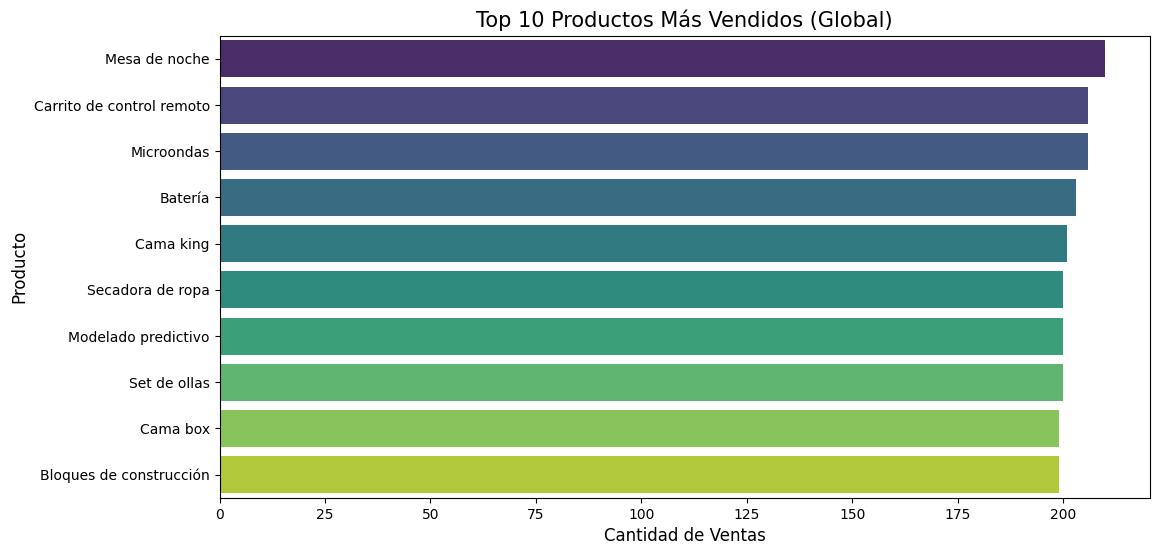

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identificar Top 3 productos más vendidos por cada ciudad/tienda
top_por_tienda = todas_las_ventas.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad')
top_por_tienda = top_por_tienda.sort_values(['Lugar de Compra', 'Cantidad'], ascending=[True, False])

print("--- Los 3 productos más vendidos por ciudad ---")
print(top_por_tienda.groupby('Lugar de Compra').head(3))

print("\n--- Los 3 productos menos vendidos por ciudad ---")
print(top_por_tienda.groupby('Lugar de Compra').tail(3))

# 2. Visualización: Gráfica de los 10 productos más vendidos en general
plt.figure(figsize=(12, 6))
top_10_global = todas_las_ventas['Producto'].value_counts().head(10)
sns.barplot(x=top_10_global.values, y=top_10_global.index, palette='viridis')

plt.title('Top 10 Productos Más Vendidos (Global)', fontsize=15)
plt.xlabel('Cantidad de Ventas', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.show()

# 5. Envío promedio por tienda

In [15]:
# Calculamos el costo de envío promedio agrupado por cada tienda
envio_promedio = todas_las_ventas.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)

print("Costo de envío promedio por ciudad:")
print(envio_promedio)

# Calculamos el costo máximo y mínimo para tener contexto
print(f"\nEl envío más caro en promedio es en: {envio_promedio.idxmax()} (${envio_promedio.max():.2f})")
print(f"El envío más económico en promedio es en: {envio_promedio.idxmin()} (${envio_promedio.min():.2f})")

Costo de envío promedio por ciudad:
Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64

El envío más caro en promedio es en: Soacha ($34768.42)
El envío más económico en promedio es en: Santa Marta ($18752.32)


#####Generando gráfico

Description

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su análisis.

/tmp/ipython-input-2386660460.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.values, y=top_productos.index, palette='viridis')


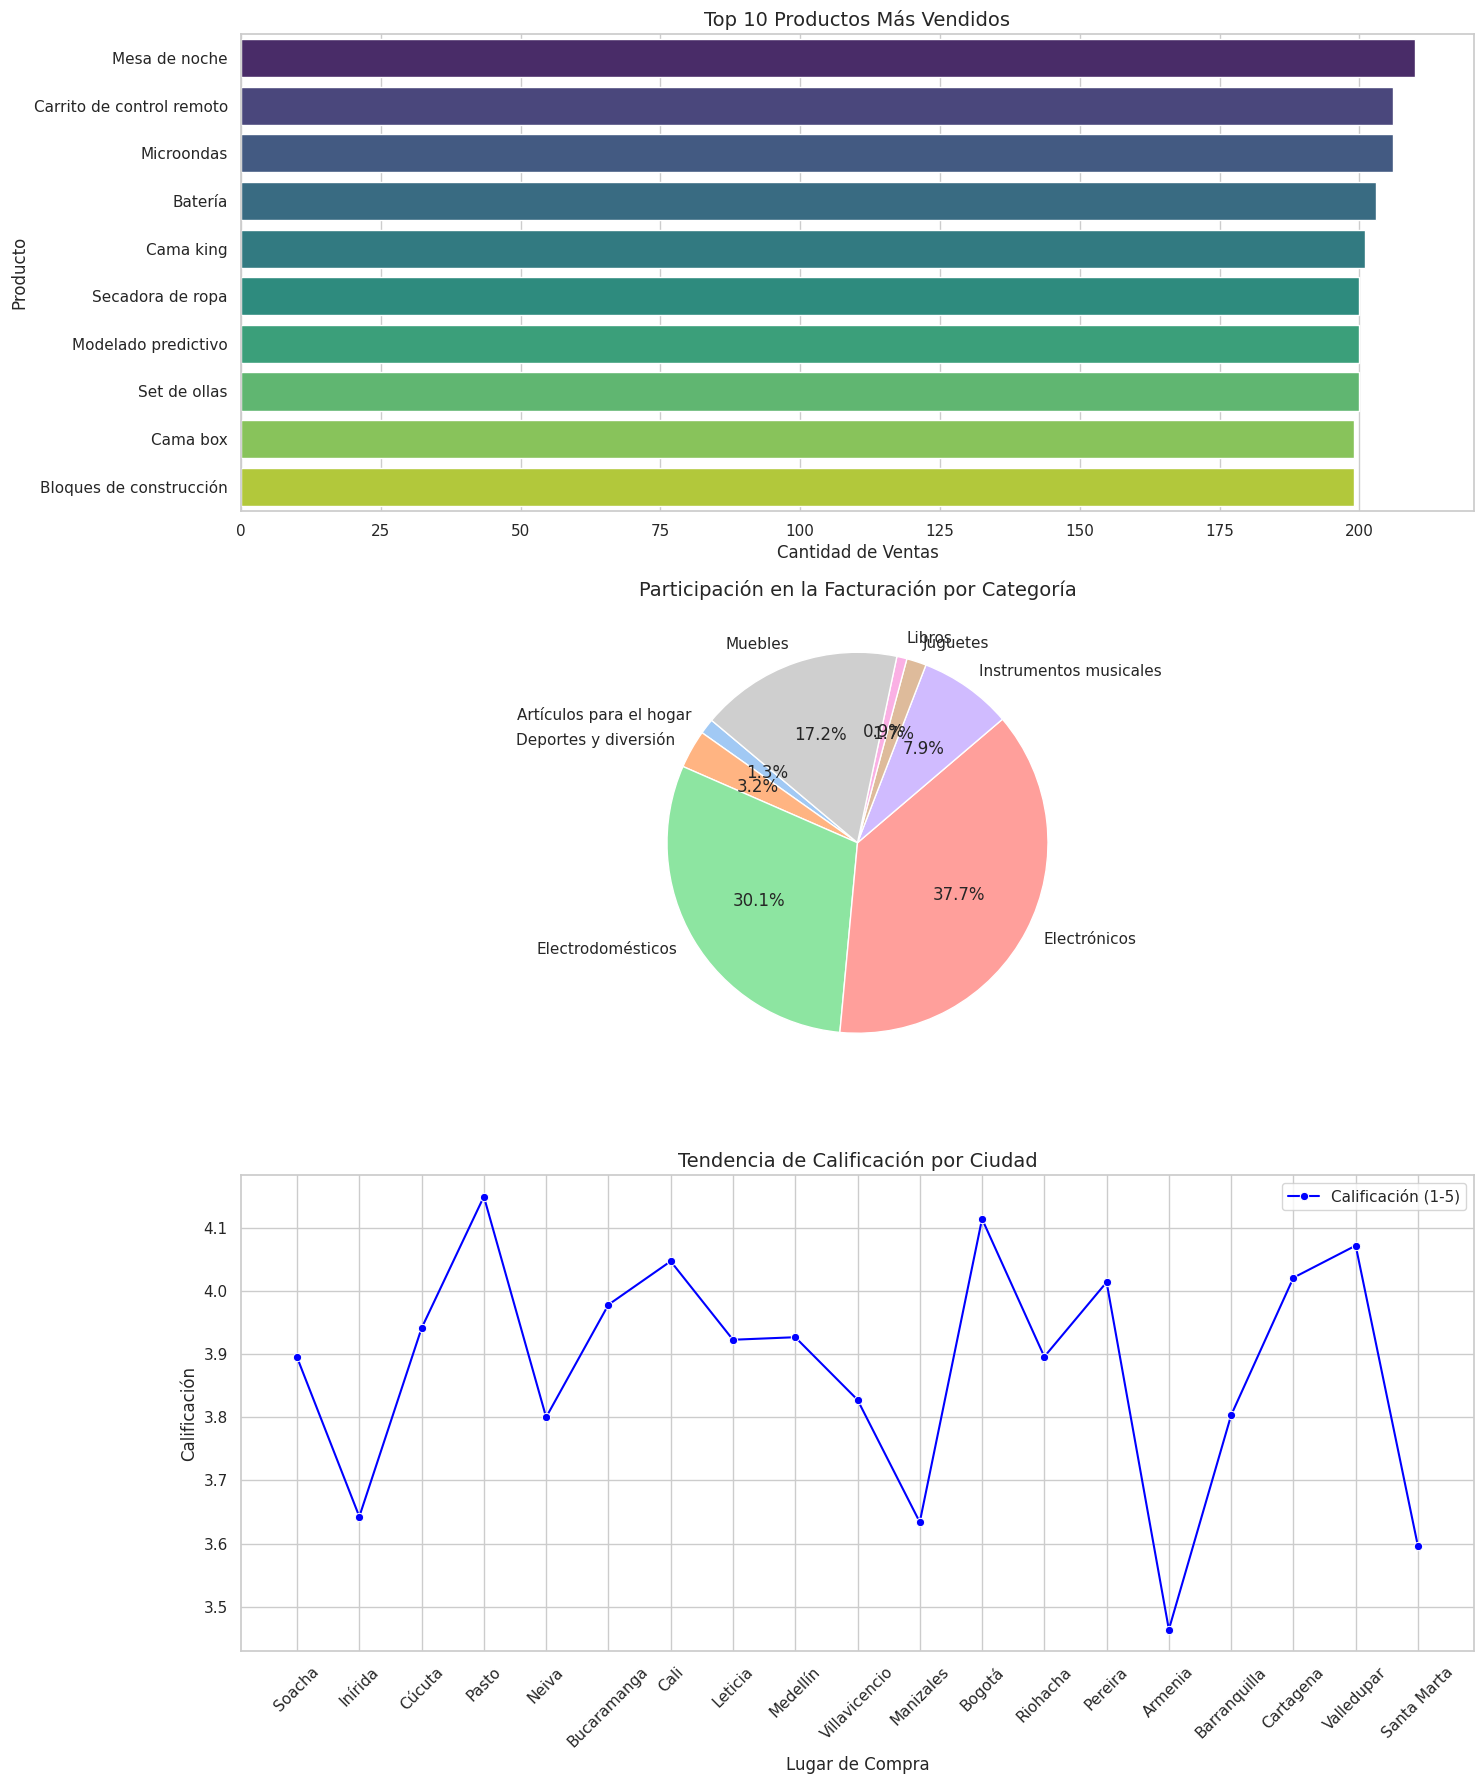

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 18))

# 1. Gráfico de Barras: Top 10 Productos con más ventas
plt.subplot(3, 1, 1)
top_productos = todas_las_ventas['Producto'].value_counts().head(10)
sns.barplot(x=top_productos.values, y=top_productos.index, palette='viridis')
plt.title('Top 10 Productos Más Vendidos', fontsize=14)
plt.xlabel('Cantidad de Ventas')

# 2. Gráfico de Pastel: Distribución de Facturación por Categoría
plt.subplot(3, 1, 2)
ventas_cat = todas_las_ventas.groupby('Categoría del Producto')['Facturacion_Producto'].sum()
plt.pie(ventas_cat, labels=ventas_cat.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Participación en la Facturación por Categoría', fontsize=14)

# 3. Gráfico de Líneas: Comparativa de Satisfacción vs Costo de Envío
plt.subplot(3, 1, 3)
ciudades = envio_promedio.index
sns.lineplot(x=ciudades, y=calificacion_promedio[ciudades], marker='o', label='Calificación (1-5)', color='blue')
plt.xticks(rotation=45)
plt.title('Tendencia de Calificación por Ciudad', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

**Esta actividad es un extra, por lo tanto es OPCIONAL.**

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.






Interpretación: Los puntos más grandes son ventas más caras. Los colores verdes indican clientes más felices.


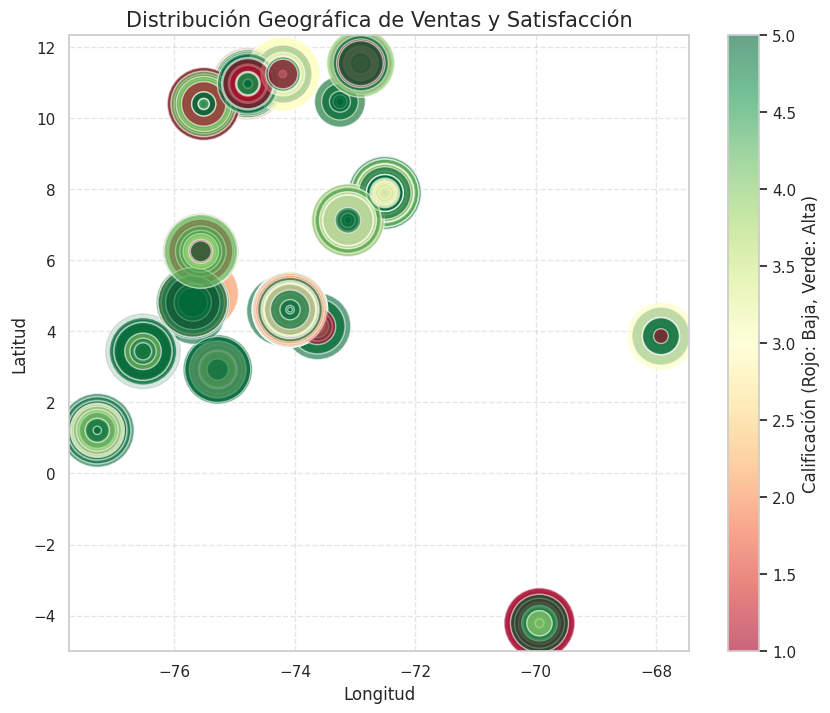

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Creamos un gráfico de dispersión geográfico
plt.figure(figsize=(10, 8))

# El tamaño del punto (s) dependerá del precio del producto
# El color (c) dependerá de la calificación
scatter = plt.scatter(todas_las_ventas['lon'],
            todas_las_ventas['lat'],
            c=todas_las_ventas['Calificación'],
            cmap='RdYlGn',
            alpha=0.6,
            edgecolors='w',
            s=todas_las_ventas['Precio']/1000) # Ajustamos escala para que no sean gigantes

plt.colorbar(scatter, label='Calificación (Rojo: Baja, Verde: Alta)')
plt.title('Distribución Geográfica de Ventas y Satisfacción', fontsize=15)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)

print("Interpretación: Los puntos más grandes son ventas más caras. Los colores verdes indican clientes más felices.")
plt.show()